# Introduction to bifurcation with 1D system with $\dot{x}=r x-x^3$

## We study numerically a pitchfork bifurcation

We will try to solve supercritical and subcritical bifurcations of the system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib as mpl

%matplotlib inline

What we can do is to solve the dynamical system numerically for a given control parameter r. We start with $x(0)=0.1$ and $r=2$. Try several trajectories by changing $r$.

<img  src="Figures_sujet/Flows_on_the_line_trajectory.png" width="700" />

In [2]:
def system(x, t):
    
    """ Function returing function 
    x_dot for the system x_dot = f(x).
    """
    
    return r*x - x**3

In [3]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

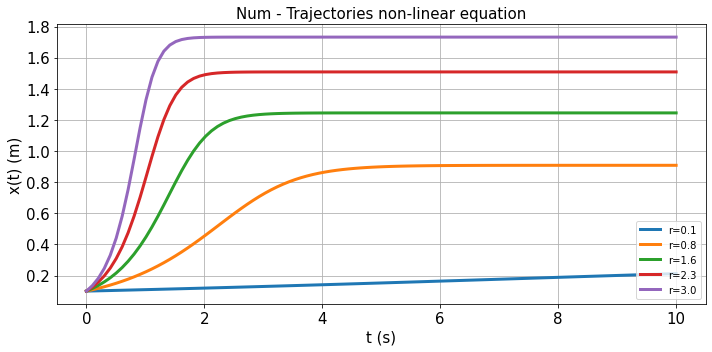

In [4]:
# Code

x0 = .1
r_vector  = np.linspace(.1, 3, 5)

# -----

plt.figure(figsize=(10,5))

size=15 #size labels, ticks, etc

for r in r_vector:
    time = np.linspace(0, 10, 100)
    sol  = odeint(system, x0, time)

    plt.plot(time, sol,lw=3, label='r={:.1f}'.format(r))

plt.title('Num - Trajectories non-linear equation', size=size)
plt.xlabel('t (s)', size=size)
plt.ylabel('x(t) (m)', size=size)

plt.xticks(size=size)    
plt.yticks(size=size)    

plt.grid(True)
plt.legend(loc=4)

plt.tight_layout()
plt.show()

The bigger r, the more equation will be linear, given then non-linear term will be neglectable.

### Phase portrait, trajectory and fixed points.

We can also plot that same trajectory in the phase space $\dot{x} = f(x)$. One trajectory should exactly follow that phase portrait:

<img  src="Figures_sujet/Trajectory_in_phase_plane.png" width="700"/>

In [5]:
def der_function(f, x):
    
    """ Function returning the numerical 
    inverse of a function, provided x and 
    f(x).
    """
    
    dx = (x[-1] - x[0]) / len(x)
    
    der_f = np.zeros_like(f)
    der_f[:-1] = (f[1:] - f[:-1]) / dx
    
    return der_f

In [6]:
#x0=.1

x0 = .1
r  = 2.

x     = np.linspace(-2., +2., 150)

sol   = odeint(system, x0, x)
der_x = der_function(sol, x)

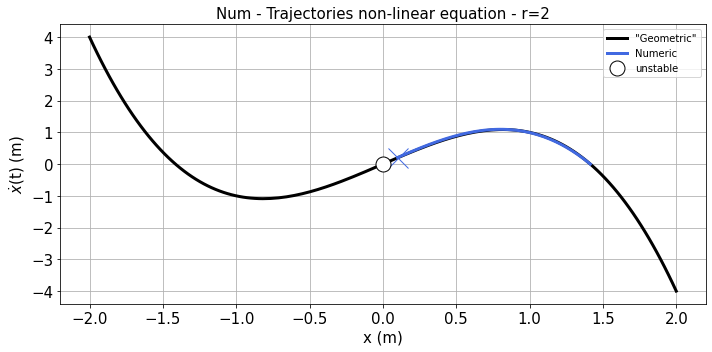

In [7]:
plt.figure(figsize=(10,5))

size=15 #size labels, ticks, etc

plt.plot(x, r*x - x**3, 'k-', lw=3, label='"Geometric"')
plt.plot(sol, der_x, '-', color='royalblue', lw=3, label='Numeric')

plt.plot(x0, system(x0, time),  'x', markersize=20, color='royalblue')
plt.plot( 0, system( 0, time), 'ko', markersize=15, markerfacecolor="white", label='unstable')

plt.title('Num - Trajectories non-linear equation - r={:.0f}'.format(r), size=size)
plt.xlabel('x (m)', size=size)
plt.ylabel(r'$\dot{x}$(t) (m)', size=size)

plt.xticks(size=size)    
plt.yticks(size=size)    

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### The sum of many trajectories starting at $x_0$ constitute the phase portrait

<img  src="Figures_sujet/Phase_portrait.png" width="700"/>

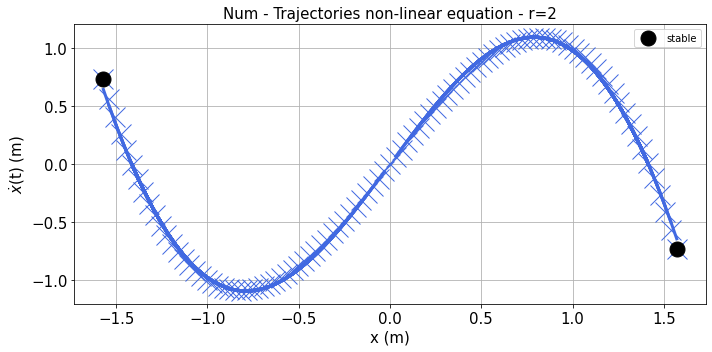

In [8]:
plt.figure(figsize=(10,5))

size=15 #size labels, ticks, etc

# -----

eps = 1.E-3
x0_vector = np.linspace(-np.pi/2 +eps, +np.pi/2 -eps, 100 +1)

# --

Nt = 200
t = x = np.linspace(0, 10, Nt)

for x0 in x0_vector:
    sol   = odeint(system, x0, t)
    der_x = der_function(sol, x)

    plt.plot(sol, der_x, '-', color='royalblue', lw=3)
    plt.plot(x0, system(x0, time), 'x', markersize=20, color='royalblue')

plt.plot(-np.pi/2, system(-np.pi/2, time), 'ko', markersize=15, label='stable')
plt.plot(+np.pi/2, system(+np.pi/2, time), 'ko', markersize=15)

plt.title('Num - Trajectories non-linear equation - r={:.0f}'.format(r), size=size)
plt.xlabel('x (m)', size=size)
plt.ylabel(r'$\dot{x}$(t) (m)', size=size)

plt.xticks(size=size)    
plt.yticks(size=size)    

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Potential energy

We can view the dynamical system $\dot{x}=f(x)$ where the forces $f(x)$ eventually derive from a potential such that ${f(x) = rx-x^3 = -\frac{dV}{dx}}$ where $V(x)$ is the potential energy of the system. Here, we have simply $V(x)=-\frac{1}{2}rx^2+\frac{1}{4}x^4$. The fixed points verify then simply $\frac{dV}{dx}=f(x)=0$.

The first order or linearized approach of potential energy around equilibrium or fixed points requires a Taylor expansion of $V(x)$ at a given $x^{\ast}$ so that
$$V_{lin}(x)=V(x^{\ast}) + \frac{V'(x^{\ast})}{1!}(x-x^{\ast}) + \frac{V''(x^{\ast})}{2!}(x-x^{\ast})^2+...$$
which means at the trivial fixed point $x^{\ast}=0$, $V_{lin}(x)=-\frac{1}{2}r(x-x^{\ast})^2 +o(x^3)$

<img  src="Figures_sujet/Potential_energy.png" width="700"/>

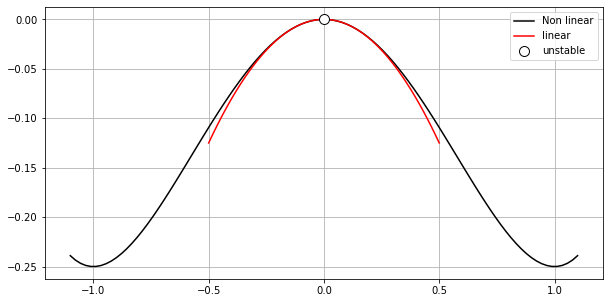

In [9]:
# graph potential energy
plt.figure(figsize=(10,5))

size=15 #size labels, ticks, etc

r     = 1.
eps   = .5 # linearization around little value
x     = np.linspace(- 1.1, +1.1, 100)
x_lin = np.linspace(-eps, +eps, 100)

V_x = -r * x**2/2 + x**4/4
V_x_lin = -r * x_lin**2/2

plt.plot(x, V_x, 'k-', label='Non linear')
plt.plot(x_lin, V_x_lin, 'r-', label='linear')
plt.plot(0, system(0,t), 'ko', markersize=10, markerfacecolor="white", label='unstable')

plt.grid(True)
plt.legend()

## Computation of the bifurcation diagram

If $\dot{x} = f(x)$, we have the fixed points $x^{\ast}$ verifying $0=f(x^{\ast})$

<img  src="Figures_sujet/Bifurcation_diagram.png" width="700"/>

In [10]:
def func(x):
    return r*x - x**3

C:\Users\vltn0\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


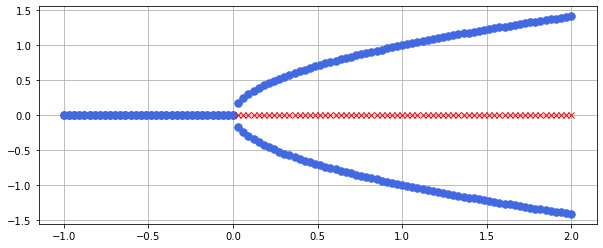

In [11]:
from scipy.optimize import fsolve

# We look for
r_vector = np.linspace(-1, +2, 100)
t  = np.linspace(0, 10, 100)

plt.figure(figsize=(10,4))

for r in r_vector:
    root  = fsolve(func,[0])

    plt.plot([r], root, 'x', color='red')
    
    # -----

    root  = fsolve(func,[-1.,+1.])

    plt.plot([r, r], root, '.', markersize=15, color='royalblue')

plt.grid(True)

One should normally calculate 2nde derivative to say if solution is stable or unstable, we kinda got lunky this time.

**THE END**